In [35]:
from wordcloud import WordCloud
import pandas as pd
import re

In [54]:
from nltk.corpus import stopwords
sw = stopwords.words("english")

In [52]:
# Generate a word cloud image
# wordcloud = WordCloud(background_color="black",max_words=2000).generate(text)

def generate_wordcloud(text):
    wordcloud = WordCloud(background_color="black",max_words=2000, max_font_size=40, stopwords=sw).generate(text)
    # Display the generated image:
    # the matplotlib way:
    import matplotlib.pyplot as plt
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

In [37]:
def clean_str_updated(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    #replace html tags and character entities with space
    string = re.sub(r"(<br/>|&quot;|&amp;|&gt;|&lt;|&nbsp;|&ndash;|&ensp;|&mdash;|&lsquo;|&rsquo;|&rdquo;|&ldquo;|&bdquo;)", " ", string)
    string = re.sub(r"[^A-Za-z0-9!\'*$@#]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)

    #removing the single quotes
    string = re.sub(r"\'", "", string)

    string = re.sub(r"\s{2,}", " ", string)
    string = string.lower()

    #reducing multiple consecutive occurrences to two occurrences
    string = re.sub(r'(.)\1{2,}',r'\1\1', string)

    list_words = []
    for x in string.split(" "):
        #remove starting and ending exclamations (!)
        x = re.sub(r"^!+", "", x)
        x = re.sub(r"!+$", "", x)
        #remove starting hashes (#)
        x = re.sub(r"^#+", "", x)
        #remove those tokens that don't contain any alphabets
        if(string_contains_alphabet(x)):
            list_words.append(x)

    #rejoin the retrieved list to form a sentence
    string = " ".join(list_words)
    return string.strip().lower()

In [38]:
def string_contains_alphabet(string):
    if re.search('[a-zA-Z]', string):
        return True
    else:
        return False

In [39]:
csvFilePath = "data/TOI_22_May.csv"
df = pd.read_csv(csvFilePath)

In [40]:
list_c = df['C_T'].tolist()

In [41]:
cleaned_list = [clean_str_updated(x) for x in list_c]

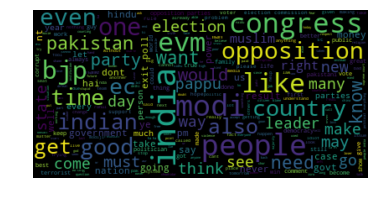

In [53]:
generate_wordcloud(" ".join(cleaned_list))

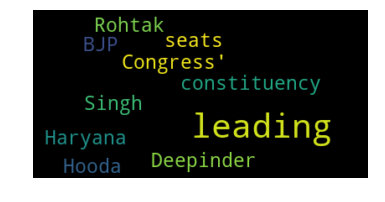

In [60]:
generate_wordcloud("BJP leading in 9 out of 10 seats in Haryana. leading Congress' Deepinder Singh Hooda leading from Rohtak leading constituency leading leading")